<a href="https://colab.research.google.com/github/LaonMoon/RNN-STUDY/blob/master/hg_9_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### LSTM과 GRU 셀

*   혼자 공부하는 머신러닝+딥러닝 09-3 예제




##### LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2)

17473536/17464789 [==============================] - 1s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 22ms/step - loss: 0.6924 - accuracy: 0.5447 - val_loss: 0.6913 - val_accuracy: 0.5904
Epoch 2/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6888 - accuracy: 0.6217 - val_loss: 0.6856 - val_accuracy: 0.6466
Epoch 3/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6728 - accuracy: 0.6557 - val_loss: 0.6463 - val_accuracy: 0.6956
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6095 - accuracy: 0.7113 - val_loss: 0.5868 - val_accuracy: 0.7134
Epoch 5/100
313/313 [==============================] - 9s 28ms/step - loss: 0.5709 - accuracy: 0.7318 - val_loss: 0.5628 - val_accuracy: 0.7308
Epoch 6/100
313/313 [==============================] - 8s 26ms/step - loss: 0.5462 - accuracy: 0.7487 - val_loss: 0.5430 - val_accuracy: 0.7496
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5249 - accuracy: 0.7623 - val_loss: 0.5239 - val_accuracy

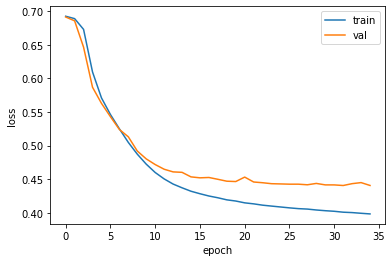

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

##### 2개의 순환층을 연결하기

In [6]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
#모든 타임스텝의 hidden state를 출력하기 위해서 return_sequences=True
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 45ms/step - loss: 0.6923 - accuracy: 0.5421 - val_loss: 0.6910 - val_accuracy: 0.6188
Epoch 2/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6871 - accuracy: 0.6212 - val_loss: 0.6783 - val_accuracy: 0.6806
Epoch 3/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6480 - accuracy: 0.6788 - val_loss: 0.6094 - val_accuracy: 0.7072
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5949 - accuracy: 0.7139 - val_loss: 0.5731 - val_accuracy: 0.7316
Epoch 5/100
313/313 [==============================] - 13s 43ms/step - loss: 0.5626 - accuracy: 0.7365 - val_loss: 0.5458 - val_accuracy: 0.7454
Epoch 6/100
313/313 [==============================] - 14s 43ms/step - loss: 0.5336 - accuracy: 0.7537 - val_loss: 0.5208 - val_accuracy: 0.7604
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5126 - accuracy: 0.7653 - val_loss: 0.5058 - val_ac

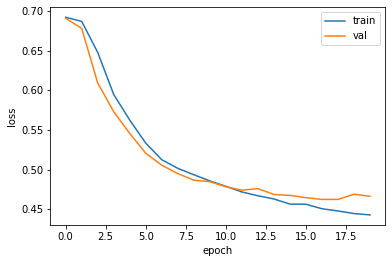

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

##### GRU 신경망 훈련하기

In [10]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1,activation='sigmoid'))

model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [11]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 22ms/step - loss: 0.6924 - accuracy: 0.5450 - val_loss: 0.6915 - val_accuracy: 0.5700
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6901 - accuracy: 0.5928 - val_loss: 0.6890 - val_accuracy: 0.6014
Epoch 3/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6864 - accuracy: 0.6132 - val_loss: 0.6847 - val_accuracy: 0.6126
Epoch 4/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6804 - accuracy: 0.6219 - val_loss: 0.6778 - val_accuracy: 0.6326
Epoch 5/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6706 - accuracy: 0.6373 - val_loss: 0.6663 - val_accuracy: 0.6448
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6545 - accuracy: 0.6528 - val_loss: 0.6471 - val_accuracy: 0.6606
Epoch 7/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6273 - accuracy: 0.6762 - val_loss: 0.6122 - val_accuracy:

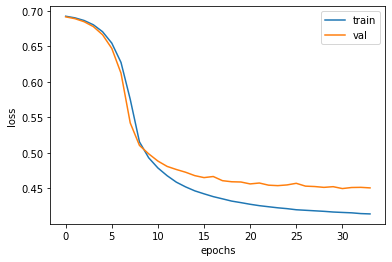

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

##### 테스트 세트 성능 확인

In [13]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 13s 16ms/step - loss: 0.4535 - accuracy: 0.7873


[0.4535239040851593, 0.7873200178146362]